In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


C:\Users\studentadmin\AppData\Local\Temp\ipykernel_5028\2433571095.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
coins = pd.read_csv("coins.csv")
coins.tail(10)

,reflectance,weight,denomination
169,26.913923,5.611840,2
170,27.800820,5.595559,2
171,28.444039,6.162531,2
172,28.414699,4.792008,2
173,28.869236,5.383916,2
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


<Axes: xlabel='reflectance', ylabel='weight'>

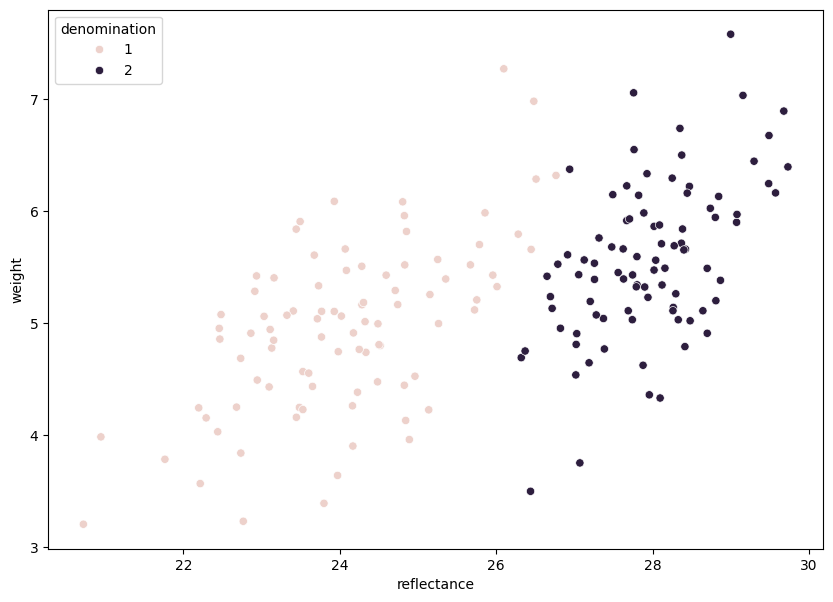

In [3]:
sns.scatterplot(x="reflectance",y="weight",data=coins, hue="denomination")

In [4]:
# test-train split
X = coins[["reflectance","weight"]].to_numpy()
y = coins[["denomination"]].to_numpy() - 1  #substract one to make denomination set 0-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
## Initiate classifier and train it using the X_train data and the y_train labels
model = Sequential()

## make sure you instantiate your classifier and name it model

model.add(Dense(10, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\studentadmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
## train your model
model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose=0)

In [7]:
## test the accuracy of your model
loss,acc = model.evaluate(X_test, y_test)
print("Test accuracy", acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9525 - loss: 0.4736  
Test accuracy 0.9444444179534912


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


(0.0, 8.0)

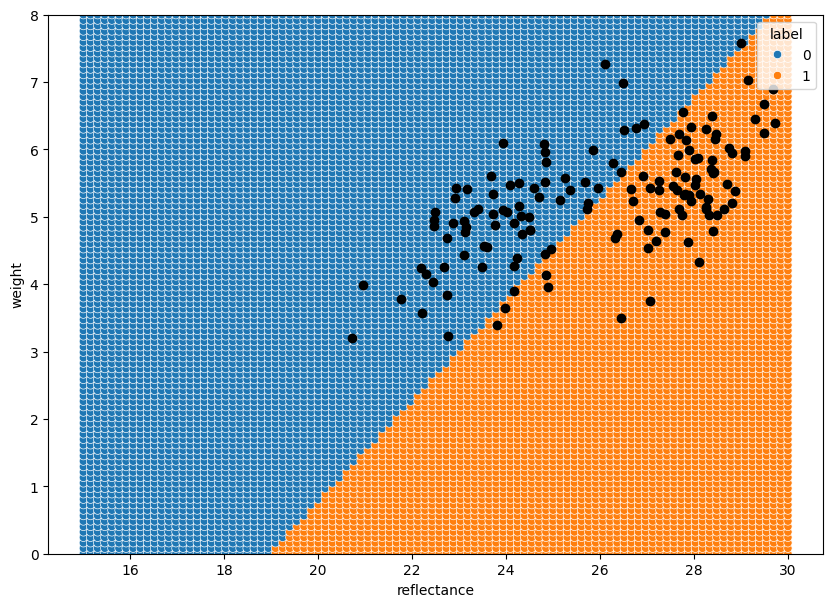

In [8]:
## plot the decision boundary of your classifier along with the scatterplot of the training data
## hint: look at the ann example
## Plot the decision boundary
reflectance= np.linspace(15,30,100)
weight = np.linspace(0,8,100)
from itertools import product
randomdata = np.array(list(product(reflectance,weight)))
g = model.predict(randomdata)
db=pd.DataFrame({"reflectance":randomdata[:,0],"weight":randomdata[:,1],"label":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="reflectance",y="weight",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")
#plt.xlim(0,5000)
plt.ylim(0,8)



In [9]:
## additional stuff you want to add 

In [10]:
# dump your classifier 
model.save('model.h5')

In [11]:
# test saved model
from keras.models import load_model
loaded_model = load_model('model.h5')

## test the accuracy of your loaded model and compare
